1. Make classification data and get it ready¶


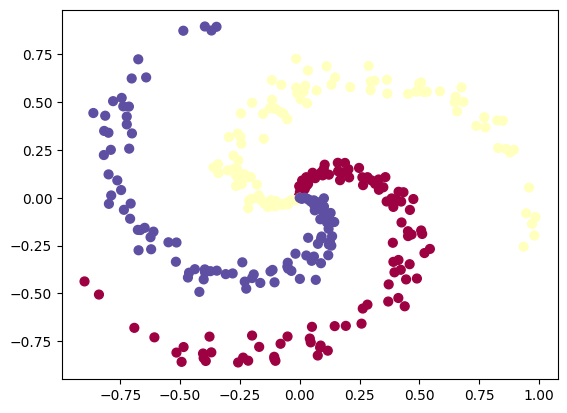

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
print(f"Frist 5 features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

Frist 5 features:
[[-0.          0.        ]
 [-0.003395    0.00951338]
 [ 0.00359945  0.01987877]
 [ 0.0006914   0.03029514]
 [ 0.01503319  0.0375032 ]]

First 5 y labels:
[0 0 0 0 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
spiral = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
spiral.head(10)

,X1,X2,label
0,-0.000000,0.000000,0
1,-0.003395,0.009513,0
2,0.003599,0.019879,0
3,0.000691,0.030295,0
4,0.015033,0.037503,0
5,0.021143,0.045866,0
6,-0.002207,0.060566,0
7,0.029088,0.064447,0
8,0.034836,0.072914,0
9,0.009994,0.090358,0


In [ ]:
# Check different labels
spiral.label.value_counts()

,count
label,
0,100
1,100
2,100


1.1 Input and output shapes¶


In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((300, 2), (300,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-0.  0.] and the same for y: 0
Shapes for one sample of X: (2,) and the same for y: ()


1.2 Turn data into tensors and create train and test splits¶


In [ ]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

# View the first five samples
X[:5], y[:5]

(tensor([[-0.0000,  0.0000],
         [-0.0034,  0.0095],
         [ 0.0036,  0.0199],
         [ 0.0007,  0.0303],
         [ 0.0150,  0.0375]]),
 tensor([0, 0, 0, 0, 0]))

In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [ ]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
NUM_CLASSES = 3
NUM_FEATURES = 2

In [ ]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
             nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
             nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
             nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
             nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=8, bias=True)
    (7): ReLU()
    (8): Linear(in_features=8, out_features=3, bias=True)
  )
)

In [ ]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [ ]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_train.to(device))[:5]

tensor([[-0.1745,  0.1448,  0.0159],
        [-0.1736,  0.1462,  0.0137],
        [-0.1765,  0.1421,  0.0200],
        [-0.1772,  0.1429,  0.0191],
        [-0.1787,  0.1413,  0.0217]], grad_fn=<SliceBackward0>)

In [ ]:
# How many elements in a single prediction sample?
model_4(X_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([3]), 3)

In [ ]:
# Make prediction logits with model
y_logits = model_4(X_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.1762,  0.1425,  0.0195],
        [-0.1743,  0.1499,  0.0089],
        [-0.1760,  0.1440,  0.0174],
        [-0.1768,  0.1420,  0.0202],
        [-0.1747,  0.1449,  0.0158]], grad_fn=<SliceBackward0>)
tensor([[0.2784, 0.3829, 0.3386],
        [0.2790, 0.3859, 0.3351],
        [0.2785, 0.3835, 0.3379],
        [0.2783, 0.3828, 0.3389],
        [0.2788, 0.3838, 0.3374]], grad_fn=<SliceBackward0>)


In [ ]:
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)

In [ ]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.2784, 0.3829, 0.3386], grad_fn=<SelectBackward0>)
tensor(1)


In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 3000

# Put data to target device
X_blob_train, y_blob_train = X_train.to(device), y_train.to(device)
X_blob_test, y_blob_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.10525, Acc: 35.00% | Test Loss: 1.12254, Test Acc: 26.67%
Epoch: 10 | Loss: 1.10199, Acc: 35.00% | Test Loss: 1.11573, Test Acc: 26.67%
Epoch: 20 | Loss: 1.10003, Acc: 35.00% | Test Loss: 1.11137, Test Acc: 26.67%
Epoch: 30 | Loss: 1.09877, Acc: 35.00% | Test Loss: 1.10851, Test Acc: 26.67%
Epoch: 40 | Loss: 1.09797, Acc: 35.00% | Test Loss: 1.10660, Test Acc: 26.67%
Epoch: 50 | Loss: 1.09737, Acc: 35.00% | Test Loss: 1.10526, Test Acc: 26.67%
Epoch: 60 | Loss: 1.09685, Acc: 35.00% | Test Loss: 1.10422, Test Acc: 26.67%
Epoch: 70 | Loss: 1.09641, Acc: 35.00% | Test Loss: 1.10346, Test Acc: 26.67%
Epoch: 80 | Loss: 1.09608, Acc: 35.00% | Test Loss: 1.10291, Test Acc: 26.67%
Epoch: 90 | Loss: 1.09574, Acc: 35.00% | Test Loss: 1.10243, Test Acc: 26.67%
Epoch: 100 | Loss: 1.09536, Acc: 35.00% | Test Loss: 1.10199, Test Acc: 26.67%
Epoch: 110 | Loss: 1.09497, Acc: 35.00% | Test Loss: 1.10158, Test Acc: 26.67%
Epoch: 120 | Loss: 1.09453, Acc: 35.00% | Test Loss: 1.10117, T

In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ -2.7479,  -1.1641,   3.6486],
        [ -2.1149,  -3.0922,   5.1520],
        [ -0.0971,   6.7751,  -7.3917],
        [  3.8496,   0.3894,  -4.5085],
        [ -4.4767,  -1.6585,   5.8912],
        [ -3.4885,  -2.2411,   5.5656],
        [  6.3767,  10.3371, -18.2913],
        [ -1.9014,   4.7658,  -3.4996],
        [  1.3214,  -0.5846,  -0.9807],
        [  0.6694,   9.7290, -11.4852]])

In [ ]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([2, 2, 1, 0, 2, 2, 1, 1, 0, 1])
Labels: tensor([2, 2, 1, 0, 2, 2, 1, 1, 0, 1])
Test accuracy: 100.0%


In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


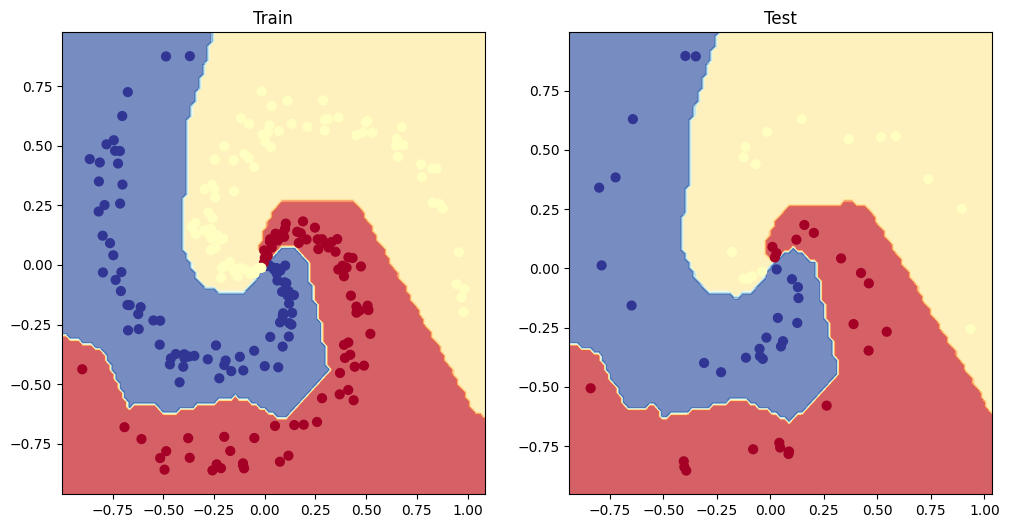

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)